<a href="https://colab.research.google.com/github/Mahmood81s/Attempt2/blob/main/Copy_of_Capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: 
Data : 
* Analysing the reasons of customers churn.
This is a fictional data set made by IBM data scientists. this dataset is from kaggle and is about uncovering the facts which has caused customers leaving or unsubscribing from the services that they have been subscribed to. the dataset has 7043 entries with total of 33 variables(columns). the reasons which make this dataset interesting are the facts that we can analyse what can cause customers churn. customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers – earning business from new customers means working leads all the way through the sales funnel, utilizing your marketing and sales resources throughout the process. Customer retention, on the other hand, is generally more cost-effective as you’ve already earned the trust and loyalty of existing customers. this reasearch proposal can be benefitial to any kind of marktet and industries, telecommunication industry, any suppliers, CEO's, Executives,Stakeholders, etc. this is classification task and categorical variables are explained and categorized as shown below for the ease of analysis. 


A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

Data Description
7043 observations with 33 variables

*  CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner: Indicate if the customer has a partner: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

Link: https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset

Research Design : 

1. data exploration, cleaning and scaling
2. Class balancing
   * Over sampling
3. Feature selection by SelectKBeat and information gain
   * Hyperparameter tuning by GridSearchCV 
      * Logistic Regression
      * Random Forest
      * Support Vector Machine
      * Decision Tree
      * Gradient Boosting
4. Feature selection by PCA
   * Hyperparameter tuning by GridSearchCV 
      * Logistic Regression
      * Random Forest
      * Support Vector Machine
      * Decision Tree
      * Gradient Boosting 
5. Model evaluation
   * Accuracy score
   * classification report
   * Confusion matrix
   * Cross_validation         
6. Analysis and comparison
7. Conclusion








In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Dataset

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mahmoodsardari","key":"485b41ec3c6ba6bf1094f8f5af7b03a6"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           9089  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5555  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2009  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2391  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 41.8MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  telco-customer-churn-ibm-dataset.zip
replace Telco_customer_churn.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco_customer_churn.xlsx to Telco_customer_churn (2).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Telco_customer_churn.xlsx']))

### Data Claening & Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.columns = df.columns.map(lambda x: x.replace(' ', ''))

In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'ZipCode', 'LatLong',
       'Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'ChurnLabel', 'ChurnValue', 'ChurnScore', 'CLTV', 'ChurnReason'],
      dtype='object')

In [ ]:
df.drop('CustomerID Count Country State City ZipCode LatLong Latitude Longitude ChurnReason'.split(), axis=1 , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   TenureMonths      7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.dtypes

Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
ChurnLabel           object
ChurnValue            int64
ChurnScore            int64
CLTV                  int64
dtype: object

In [ ]:
df.TotalCharges.values

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [ ]:
# pd.to_numeric(df.TotalCharges,errors='coerce')
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
# df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV
2234,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578
2438,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0,68,5504
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0,45,2048
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0,48,4950
2856,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0,30,4740
4331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0,53,2019
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0,49,2299
5104,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0,27,3763
5719,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0,69,4890
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0,44,2342


In [ ]:
df.iloc[2234]['TotalCharges']
# df.iloc[2234]

' '

In [ ]:
df1 = df[df.TotalCharges!=' ']

In [ ]:
df1.shape

(7032, 23)

In [ ]:
df.shape

(7043, 23)

In [ ]:
df1.dtypes

Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
ChurnLabel           object
ChurnValue            int64
ChurnScore            int64
CLTV                  int64
dtype: object

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.dtypes

Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
ChurnLabel           object
ChurnValue            int64
ChurnScore            int64
CLTV                  int64
dtype: object

In [ ]:
df1[df1.ChurnLabel=='No']

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV
1869,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964
1870,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,61,3441
1871,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307
1872,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,43,4459
1873,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,51,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793


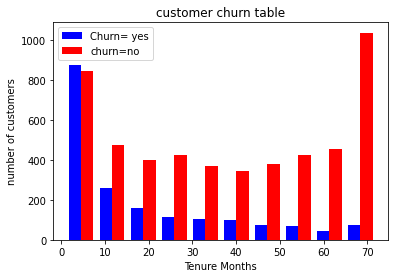

In [ ]:
Tenure_ChurnLabel_No = df1[df1.ChurnLabel=='No'].TenureMonths
Tenure_ChurnLabel_yes = df1[df1.ChurnLabel=='Yes'].TenureMonths

plt.xlabel('Tenure Months')
plt.ylabel('number of customers')
plt.title('customer churn table')
plt.hist([Tenure_ChurnLabel_yes, Tenure_ChurnLabel_No], color=['blue' ,'red'], label=['Churn= yes', 'churn=no'])
plt.legend()

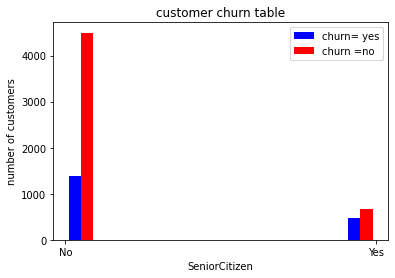

In [ ]:
Senior_No = df1[df1.ChurnLabel=='No'].SeniorCitizen
Senior_yes = df1[df1.ChurnLabel=='Yes'].SeniorCitizen

plt.xlabel('SeniorCitizen')
plt.ylabel('number of customers')
plt.title('customer churn table')
plt.hist([Senior_yes, Senior_No], color=['blue' ,'red'], label=['churn= yes', 'churn =no'])
plt.legend()

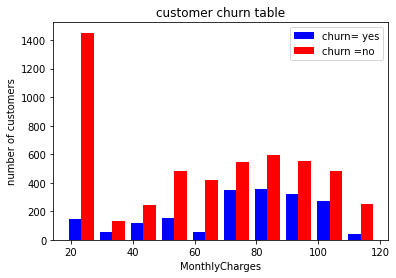

In [ ]:
Senior_No = df1[df1.ChurnLabel=='No'].MonthlyCharges
Senior_yes = df1[df1.ChurnLabel=='Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('number of customers')
plt.title('customer churn table')
plt.hist([Senior_yes, Senior_No], color=['blue' ,'red'], label=['churn= yes', 'churn =no'])
plt.legend()

In [ ]:
def unique_value(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [ ]:
unique_value(df1)

Gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
ChurnLabel : ['Yes' 'No']


In [ ]:
df1.replace('No internet service' , 'No', inplace=True)
df1.replace('No phone service' , 'No', inplace=True)

In [ ]:
unique_value(df1)

Gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
ChurnLabel : ['Yes' 'No']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encodeur = LabelEncoder()
for col in df1.columns:
     if col in ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','MultipleLines','OnlineSecurity',
                'OnlineBackup','DeviceProtection' , 'TechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingTV', 'ChurnLabel', 'Gender']:
        df1[col] = encodeur.fit_transform(df1[col])

In [ ]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

Gender: [1 0]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [0 1]
TenureMonths: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72]
PhoneService: [1 0]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [1 0]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'Two year' 'One year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [ 53.85  70.7   99.65 ... 108.35  63.1   78.7 ]
TotalCharges: [ 108.15  151.65  820.5  ... 7362.9   346.45 6844.5 ]
ChurnLabel: [1 0]
ChurnValue: [1 0]
ChurnScore: [ 86  67  84  89  78 100  92  77  97  74  66  65  70  90  82  69  81  96
  87  88  75  76  95  99  80  73  94  83  98  71  85

In [ ]:
pd.get_dummies(data=df1, columns=['InternetService'])

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,1,0,0
1,0,0,0,1,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,0,1,0
2,0,0,0,1,8,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,0,1,0
3,0,0,1,1,28,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,0,1,0
4,1,0,0,1,49,1,1,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),21.15,1419.40,0,0,45,5306,0,0,1
7039,1,0,1,1,24,1,1,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0,0,59,2140,1,0,0
7040,0,0,1,1,72,1,1,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,71,5560,0,1,0
7041,0,0,1,1,11,0,0,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,0,59,2793,1,0,0


In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'ChurnLabel',
       'ChurnValue', 'ChurnScore', 'CLTV', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1925,0,1,0,0,56,1,1,1,1,1,0,1,1,0,110.50,6139.50,0,0,21,4463,0,1,0,0,1,0,0,0,1,0
5467,0,0,1,0,72,1,1,1,0,1,1,1,1,1,84.90,6065.30,0,0,65,4447,1,0,0,0,0,1,1,0,0,0
5885,0,0,0,0,3,1,0,0,0,0,0,0,0,0,44.75,148.05,0,0,20,3422,1,0,0,1,0,0,0,0,0,1
4323,1,0,1,0,63,1,0,1,1,0,1,1,0,0,70.80,4448.80,0,0,44,5114,1,0,0,0,1,0,0,1,0,0


In [ ]:
df2.dtypes

Gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
TenureMonths                                 int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
ChurnLabel                                   int64
ChurnValue                                   int64
ChurnScore                                   int64
CLTV                           

### Feature Sclaing

In [ ]:
# feature scaling
cols_to_scale = ['TenureMonths', 'MonthlyCharges', 'TotalCharges', 'ChurnScore', 'CLTV']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(4)

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
581,1,0,1,0,0.929577,1,1,1,1,1,0,1,1,1,0.925871,0.861216,1,1,0.842105,0.476540,0,1,0,0,1,0,0,0,1,0
2632,0,0,0,0,0.647887,1,1,1,0,1,0,1,0,0,0.762687,0.530400,0,0,0.494737,0.557483,0,1,0,0,1,0,0,1,0,0
5566,1,1,1,0,0.985915,0,0,0,1,1,0,1,1,1,0.338806,0.432293,0,0,0.484211,0.775628,1,0,0,1,0,0,1,0,0,0
4778,0,0,0,0,1.000000,1,1,0,1,1,1,1,1,1,0.893532,0.898661,0,0,0.242105,0.762064,0,1,0,0,0,1,0,1,0,0


In [ ]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

Gender: [1 0]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [0 1]
TenureMonths: [0.014 0.099 0.38  0.676 0.127 0.    0.648 0.225 0.056 0.465 0.141 0.197
 0.239 0.113 0.085 0.155 0.338 0.944 0.761 0.507 0.028 0.366 0.268 0.042
 0.803 0.732 0.169 0.07  0.254 0.817 0.211 0.718 0.324 0.437 0.521 0.746
 0.592 0.873 0.282 0.958 0.296 0.845 0.831 0.662 0.549 0.31  0.535 0.479
 0.775 0.901 0.451 0.408 0.62  0.634 0.859 0.972 0.69  0.606 0.986 0.352
 0.183 0.563 0.915 0.887 0.394 0.577 0.93  0.704 0.423 0.789 0.493 1.   ]
PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [1 0]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [0.354 0.522 0.81  ... 0.897 0.446 0.601]
TotalCharges: [0.01  0.015 0.093 ... 0.847 0.038 0.788]
ChurnLabel: [1 0]
ChurnValue: [1 0]
ChurnScore: [0.853 0.653 0.832 0.884 0.768 1.    0.916 0.758 0.968 0.726 0.642 0.632
 0.684 0.895 0.811 0.674 0.8   0.958 0.863 0.874 0.7

In [ ]:
df2.drop('ChurnValue', axis=1, inplace=True)

In [ ]:
X = df2.drop('ChurnLabel', axis='columns')
y = df2['ChurnLabel']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=5)

In [ ]:
X_train.shape, y_train.shape

((5625, 28), (5625,))

In [ ]:
X_test.shape

(1407, 28)

In [ ]:
X_train[:3]

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,ChurnScore,CLTV,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5663,1,0,0,1,0.140845,1,1,0,0,0,0,0,1,0,0.676119,0.100900,0.378947,0.256616,0,1,0,1,0,0,0,0,1,0
101,0,0,0,0,0.464789,1,0,0,1,0,0,0,0,1,0.554229,0.289136,0.936842,0.843229,0,1,0,1,0,0,0,1,0,0
2619,0,0,1,0,0.985915,0,0,1,1,0,1,1,1,0,0.401990,0.476165,0.452632,0.477652,1,0,0,0,0,1,0,0,0,1


In [ ]:
len(X_train.columns)

28

### class balancing

###**Class Balancing: Over sampling** with SMOT

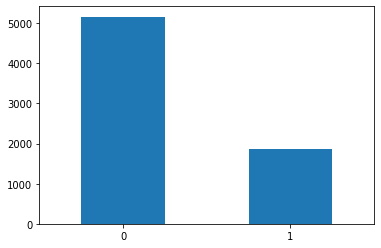

In [ ]:
count_classes = pd.value_counts(df2['ChurnLabel'], sort=True)
count_classes.plot(kind='bar', rot =0 )

In [ ]:
X = df2.drop('ChurnLabel', axis='columns')
y = df2['ChurnLabel']

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
#implementing oversampling
smk = SMOTETomek(sampling_strategy = 'minority', random_state=42)
X_sm, y_sm = smk.fit_sample(X,y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm ,test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
>>> unique, counts = np.unique(y_sm, return_counts=True)
>>> dict(zip(unique, counts))

{0: 5050, 1: 5050}

In [ ]:
y.value_counts()

0    5163
1    1869
Name: ChurnLabel, dtype: int64

In [ ]:
>>> unique, counts = np.unique(X_sm, return_counts=True)
>>> dict(zip(unique, counts))

{0.0: 148151,
 5.769674590352849e-06: 2,
 1.1539349180705698e-05: 1,
 1.312309224753031e-05: 1,
 2.3078698361412263e-05: 1,
 2.8848372951765545e-05: 1,
 3.43638595264774e-05: 1,
 3.4618047542118394e-05: 3,
 3.768155672254535e-05: 1,
 4.038772213247124e-05: 1,
 4.6157396722824526e-05: 4,
 4.892522818846293e-05: 1,
 5.192707131317781e-05: 3,
 5.4974953491149337e-05: 1,
 5.769674590353109e-05: 4,
 5.8011321311489186e-05: 1,
 6.220921931183346e-05: 1,
 6.557004888283965e-05: 1,
 6.677470910242437e-05: 1,
 6.923609508423679e-05: 2,
 7.500576967459007e-05: 5,
 8.077544426494335e-05: 4,
 8.654511885529664e-05: 6,
 9.231479344564949e-05: 2,
 9.49337827517424e-05: 1,
 9.808446803600233e-05: 6,
 0.00010385414262635562: 2,
 0.0001044059789626298: 1,
 0.00010536313035747973: 1,
 0.0001089102205927896: 1,
 0.0001096238172167089: 8,
 0.00011035555055706438: 1,
 0.00011098874937703315: 1,
 0.00011539349180706175: 2,
 0.0001163373231689646: 1,
 0.00011644350625740814: 1,
 0.00011847214817332466: 1,
 0

In [ ]:
X_sm.shape, y_sm.shape

((10100, 28), (10100,))

### Feature Selection:
Information gain, SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import set_printoptions
import warnings
warnings.filterwarnings("ignore")

Information gain:

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info = mutual_info_classif(X,y)

In [ ]:
mutual_data = pd.Series(mutual_info, index = X.columns)
mutual_data.sort_values(ascending = False)

ChurnScore                                 0.375899
Contract_Month-to-month                    0.085687
TenureMonths                               0.073305
Contract_Two year                          0.058301
PaymentMethod_Electronic check             0.052714
MonthlyCharges                             0.049331
InternetService_Fiber optic                0.046232
TotalCharges                               0.045151
Dependents                                 0.041831
InternetService_No                         0.030668
OnlineSecurity                             0.022349
Gender                                     0.021356
TechSupport                                0.018893
PaperlessBilling                           0.018818
Contract_One year                          0.015448
PaymentMethod_Bank transfer (automatic)    0.014360
Partner                                    0.011336
InternetService_DSL                        0.010900
MultipleLines                              0.009016
PaymentMetho

SelectKBest_1: 

In [ ]:
sel_fea = SelectKBest(score_func=chi2, k=10).fit(X,y)
sel_bool = sel_fea.get_support()
X_sel = X[X.columns[sel_bool]]
X_sel.head()

,Dependents,TenureMonths,OnlineSecurity,ChurnScore,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check
0,0,0.014085,1,0.852632,0,0,1,0,0,0
1,1,0.014085,0,0.652632,1,0,1,0,0,1
2,1,0.098592,0,0.852632,1,0,1,0,0,1
3,1,0.380282,0,0.831579,1,0,1,0,0,1
4,1,0.676056,0,0.884211,1,0,1,0,0,0


SelectKBest_2:

In [ ]:
top_features = SelectKBest(score_func=chi2, k=2)
top_features_sel = top_features.fit(X,y)

In [ ]:
X.shape

(7032, 28)

In [ ]:
df_scores= pd.DataFrame(top_features_sel.scores_, columns=['Score'])
df_columns = pd.DataFrame(X.columns)
feature_rank = pd.concat([df_scores, df_columns], axis=1)
feature_rank.columns = ['score', 'features']
feature_rank.nlargest(10, 'score')

,score,features
21,516.714004,Contract_Month-to-month
23,486.223101,Contract_Two year
26,424.113152,PaymentMethod_Electronic check
19,372.082851,InternetService_Fiber optic
3,333.236458,Dependents
20,285.475152,InternetService_No
16,282.449395,ChurnScore
4,238.007569,TenureMonths
22,176.608724,Contract_One year
7,147.165601,OnlineSecurity


SelectKBest_3:

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[2.543e-01 1.335e+02 8.186e+01 3.332e+02 2.380e+02 9.295e-02 6.515e+00
 1.472e+02 3.121e+01 2.022e+01 1.354e+02 1.732e+01 1.593e+01 1.050e+02
 5.060e+01 7.326e+01 2.824e+02 1.499e+01 7.114e+01 3.721e+02 2.855e+02
 5.167e+02 1.766e+02 4.862e+02 7.662e+01 9.997e+01 4.241e+02 4.473e+01]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 1.]
 [1. 1. 0. 1.]
 [1. 1. 0. 0.]]


### GridsearchCV Hyperparameter tuning 
### Logistic Regression, Decision Tree, SVM, Random Forest
## 1. Logistic Regression: 

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model_1 = lr_model.fit(X_train,y_train)
lr_model_1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_grid_param = {'C' : [2],
                 'penalty' : ['l2'],
                 'random_state' : [None], 
                 'max_iter' : [1000]}

In [ ]:
lr_grid = GridSearchCV(lr_model_1, param_grid=lr_grid_param, n_jobs=-1, cv=None)

In [ ]:
lr_grid_model = lr_grid.fit(X_train,y_train)
lr_grid_model

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'max_iter': [1000], 'penalty': ['l2'],
                         'random_state': [None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lr_grid_model.best_estimator_

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_grid_model.best_params_

{'C': 2, 'max_iter': 1000, 'penalty': 'l2', 'random_state': None}

In [ ]:
lr_grid_model.best_score_

0.930940594059406

In [ ]:
yp_lr_grid_model = lr_grid_model.predict(X_test)
yp_lr_grid_model[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
yp_lr_model_1 =lr_model_1.predict(X_test)
yp_lr_model_1[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

Evaluation : Classification_report, cross_val_score, confusion matrix

In [ ]:
print(classification_report(y_test, yp_lr_model_1))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1010
           1       0.92      0.94      0.93      1010

    accuracy                           0.93      2020
   macro avg       0.93      0.93      0.93      2020
weighted avg       0.93      0.93      0.93      2020



In [ ]:
cm = confusion_matrix(y_test, yp_lr_model_1)
cm

array([[927,  83],
       [ 60, 950]])

In [ ]:
KFold_validation = KFold(10)
results = cross_val_score(lr_model_1, X, y, cv=KFold_validation)
print (results)
print(np.mean(results))

[0.77  0.777 0.865 0.937 0.956 0.935 0.94  0.939 0.947 0.937]
0.9003489509246088


In [ ]:
KFold_validation = KFold(10)
results = cross_val_score(lr_grid_model, X, y, cv=KFold_validation)
print (results)
print(np.mean(results))

[0.776 0.788 0.868 0.939 0.954 0.933 0.94  0.936 0.946 0.936]
0.9016267538471487


In [ ]:
print(confusion_matrix(y_test, yp_lr_model_1))
print(accuracy_score(y_test, yp_lr_model_1))
print(classification_report(y_test, yp_lr_model_1))

[[927  83]
 [ 60 950]]
0.9292079207920793
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1010
           1       0.92      0.94      0.93      1010

    accuracy                           0.93      2020
   macro avg       0.93      0.93      0.93      2020
weighted avg       0.93      0.93      0.93      2020



In [ ]:
print(confusion_matrix(y_test, yp_lr_grid_model))
print(accuracy_score(y_test, yp_lr_grid_model))
print(classification_report(y_test, yp_lr_grid_model))

[[930  80]
 [ 59 951]]
0.9311881188118812
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1010
           1       0.92      0.94      0.93      1010

    accuracy                           0.93      2020
   macro avg       0.93      0.93      0.93      2020
weighted avg       0.93      0.93      0.93      2020



## 2. Random Forest

In [ ]:
rf_model_1 = RandomForestClassifier(n_estimators=500)
rf_model_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# yp is y prediction
yp_rf_2 = rf_model_1.predict(X_test)

In [ ]:
yp_rf_2[:20]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test[:20]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
cm = confusion_matrix(y_test, yp_rf_2)
cm

array([[955,  55],
       [ 39, 971]])

In [ ]:
print(classification_report(y_test, yp_rf_2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1010
           1       0.95      0.96      0.95      1010

    accuracy                           0.95      2020
   macro avg       0.95      0.95      0.95      2020
weighted avg       0.95      0.95      0.95      2020



In [ ]:
>>> unique, counts = np.unique(y_train, return_counts=True)
>>> dict(zip(unique, counts))

{0: 4040, 1: 4040}

In [ ]:
param_rf_grid = {'n_estimators' : (10, 30, 500),
                      'criterion' : ['entropy'],
                      'max_depth' :(3, 5, 7, 9, 10),
                      'min_samples_split' :(2, 4, 6),
#                     'min_samples_leaf' :min_samples_leaf,
                      'max_features' :['sqrt']}                    

In [ ]:
rf_grid= GridSearchCV(RandomForestClassifier(n_jobs=-1, oob_score=False), param_grid=param_rf_grid, verbose= True)
rf_grid_model = rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  4.9min finished


In [ ]:
rf_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rf_grid_model.best_score_

0.9493811881188119

In [ ]:
#building model with best parameters
rf_model_1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rf_model_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Model Evaluation: 

In [ ]:
KFold_validation = KFold(10)

In [ ]:
results = cross_val_score(rf_model_1, X, y, cv=KFold_validation)
print (results)
print(np.mean(results))

[0.795 0.768 0.892 0.947 0.95  0.949 0.94  0.925 0.957 0.94 ]
0.9064631692098798


In [ ]:
results = cross_val_score(rf_model_1, X, y, cv=KFold_validation)
print (results)
print(np.mean(results))

[0.791 0.783 0.886 0.95  0.952 0.952 0.939 0.93  0.957 0.945]
0.9084532199663778


In [ ]:
#X_test_sel = X_test[X.columns[sel_bool]]

In [ ]:
#print (f'Train Accuracy - : {rf_model.score(X_train, y_train) :.3f}')
#print (f'Test Accuracy - : {rf_model.score(X_test,y_test) :.3f}')

In [ ]:
#print (f'Train Accuracy - : {rf_Grid.score(X_train, y_train) :.3f}')
#print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test) :.3f}')

In [ ]:
y_rf_grid_2 = rf_grid_model.predict(X_test)
y_rf_grid_2[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
yp_rf_2[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test, yp_rf_2))
print(accuracy_score(y_test, yp_rf_2))
print(classification_report(y_test, yp_rf_2))

[[955  55]
 [ 39 971]]
0.9534653465346534
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1010
           1       0.95      0.96      0.95      1010

    accuracy                           0.95      2020
   macro avg       0.95      0.95      0.95      2020
weighted avg       0.95      0.95      0.95      2020



## 3. Support Vector machine:

In [ ]:
# fitting Svm classifier to the training data set
from sklearn.svm import SVC
Model_SVC_1 = SVC(C=30, kernel='rbf', gamma='auto').fit(X_train, y_train)
# predicting the test set result
yp_SVC_1 = Model_SVC_1.predict(X_test)

In [ ]:
Model_SVC_1.score(X_test, y_test)

0.9435643564356435

In [ ]:
param_grid_SVC = {'C' : [1, 10, 100, 1000], 'kernel' : ['linear', 'rbf']
                 }

In [ ]:
SVC_grid_model = GridSearchCV(SVC(gamma ='auto'), param_grid= param_grid_SVC , return_train_score=False, cv = 2 )

In [ ]:
SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
SVC_grid_model.cv_results_

{'mean_fit_time': array([ 0.203,  0.469,  0.395,  0.329,  1.543,  0.378, 12.044,  0.772]),
 'mean_score_time': array([0.099, 0.322, 0.082, 0.203, 0.081, 0.159, 0.079, 0.144]),
 'mean_test_score': array([0.932, 0.922, 0.932, 0.938, 0.932, 0.936, 0.933, 0.93 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'rbf'},
  {'C': 1000, 'kernel': 'linear'},
  {'C': 1000, 'kernel': 'rbf'}],
 'rank_test_score': a

In [ ]:
df = pd.DataFrame(SVC_grid_model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.203273,0.003435,0.098705,0.000626,1,linear,"{'C': 1, 'kernel': 'linear'}",0.930198,0.934406,0.932302,0.002104,5
1,0.469496,0.002077,0.321684,0.003849,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.922277,0.922030,0.922153,0.000124,8
2,0.395305,0.021544,0.082353,0.005984,10,linear,"{'C': 10, 'kernel': 'linear'}",0.928960,0.935149,0.932054,0.003094,6
3,0.329014,0.010269,0.203477,0.004445,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.934406,0.941584,0.937995,0.003589,1
4,1.542551,0.097395,0.081491,0.007598,100,linear,"{'C': 100, 'kernel': 'linear'}",0.929455,0.935396,0.932426,0.002970,4
5,0.377663,0.017419,0.158676,0.009474,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.935149,0.937376,0.936262,0.001114,2
6,12.043891,1.345417,0.079039,0.005143,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.928713,0.936386,0.932550,0.003837,3
7,0.771835,0.059042,0.143567,0.008648,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",0.931188,0.928713,0.929950,0.001238,7


In [ ]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.932302
1,1,rbf,0.922153
2,10,linear,0.932054
3,10,rbf,0.937995
4,100,linear,0.932426
5,100,rbf,0.936262
6,1000,linear,0.932550
7,1000,rbf,0.929950


In [ ]:
SVC_grid_model.best_score_

0.9379950495049505

In [ ]:
SVC_grid_model.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
SVC_grid_model.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#building SVC model with the picked paramater
Model_SVC_1 = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
Model_SVC_1.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluation:

In [ ]:
print(confusion_matrix(y_test, yp_SVC_1))
print(accuracy_score(y_test, yp_SVC_1))
print(classification_report(y_test, yp_SVC_1))

[[937  73]
 [ 41 969]]
0.9435643564356435
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1010
           1       0.93      0.96      0.94      1010

    accuracy                           0.94      2020
   macro avg       0.94      0.94      0.94      2020
weighted avg       0.94      0.94      0.94      2020



In [ ]:
results = cross_val_score(Model_SVC_1, X, y, cv=KFold_validation)
print (results)
print(np.mean(results))

[0.766 0.774 0.856 0.939 0.947 0.942 0.952 0.929 0.942 0.927]
0.8973627634811846


## 4. Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf_2 = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
yp_GB_2 = GB_clf_2.predict(X_test)

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
#    "min_samples_split": np.linspace(0.1, 0.5, 12),
#    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5],
#    "max_features":["log2","sqrt"],
#    "criterion": ["friedman_mse",  "mae"],
#    "subsample":[0.5, 0.618, 0.8, 0.9,  1.0],
    "n_estimators":[10]
    }

In [ ]:
clf_GB_2 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf_GB_2.fit(X_train, y_train)
print(clf_GB_2.score(X_train, y_train))
print(clf_GB_2.best_params_)

0.9533415841584159
{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 10}


### PCA-GridSearchCV
## 1. Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
# For PCA, First Need to Scale the Data.
scaler_SVC = StandardScaler()
scaler_SVC.fit(X_test)
X_test_scaled = scaler_SVC.transform(X_test)

In [ ]:
pca2 = PCA(n_components=2)
X_test_scaled_reduced = pca2.fit_transform(X_test_scaled)
print("shape of the scaled and 'PCA'ed features: ", np.shape(X_test_scaled))

shape of the scaled and 'PCA'ed features:  (2020, 28)


In [ ]:
SVC_model_2 = SVC(kernel='rbf', C=1., gamma=0.01).fit(X_train, y_train)

classify = SVC_model_2.fit(X_test_scaled_reduced, y_test)

In [ ]:
# Let's see the variance to see out of the 
# 4 components which are contributing most 

feat_var = np.var(X_test_scaled, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))

print ("Variance Ratio of the 4 Principal Components Ananlysis: ", feat_var_rat)

Variance Ratio of the 4 Principal Components Ananlysis:  [0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036
 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036
 0.036 0.036 0.036 0.036]


In [ ]:
# Pipeline Steps are StandardScaler, PCA and SVM 
pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC(kernel='rbf'))]

check_params= {
    'pca__n_components': [2], 
    'SupVM__C': [1, 10, 100, 1000], 
}

pipeline = Pipeline(pipe_steps)

In [ ]:
print ("Start Fitting Training Data")
cv = 5
create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
create_grid.fit(X_train, y_train)
print ("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, y_test)))
print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
print (create_grid.best_params_)


Start Fitting Training Data


score for 4 fold CV := 0.82
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 1000, 'pca__n_components': 2}
score for 5 fold CV := 0.82
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 1000, 'pca__n_components': 2}

out of the loop


In [ ]:
print ("grid best params: ", create_grid.best_params_) 

grid best params:  {'SupVM__C': 1000, 'pca__n_components': 2}


Confusion Matrix: 

[[800 210]
 [152 858]]


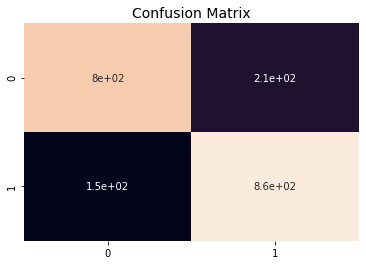

In [ ]:
# Time for Prediction and Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = create_grid.predict(X_test)
# print (Y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n")
print(cm)


df_cm = pd.DataFrame(cm, range(2), range(2))

sns.heatmap(df_cm, annot=True, cbar=False)
plt.title("Confusion Matrix", fontsize=14)
plt.savefig("Confusion Matrix.png", dpi=200)

## 2. Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [ ]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5],
    'logistic__C': np.logspace(-4, 4, 4),}


In [ ]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.794):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 15}


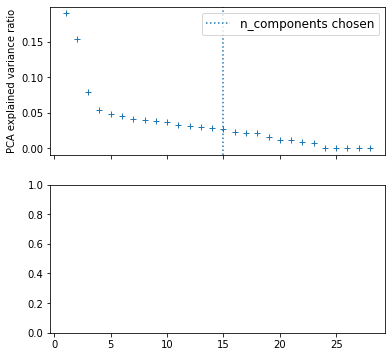

In [ ]:
# Plot the PCA spectrum
pca.fit(X_test)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

## 2nd approach:

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

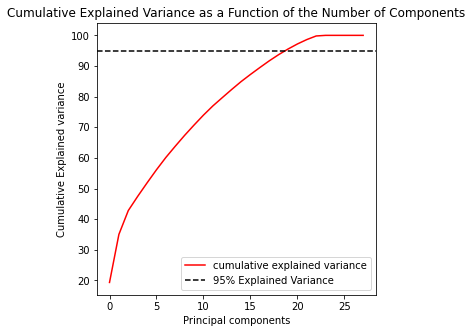

In [ ]:
pca=PCA()
pca.fit(X_test_scaler)
pca.fit(X_train_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(5, 5))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [ ]:
pca = PCA(.95) 
pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_test_pca  = pca.transform(X_test_scaler)

In [ ]:
logistic_regression = LogisticRegression(n_jobs = -1)

# Set of parameters we want to try for out Model
parameters = { 'C' : [1.1,1.25,1.5]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(X_train_pca , y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished


In [ ]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.9324250972647334
{'C': 1.1}


In [ ]:
logistic_regression = LogisticRegression( C = 1.1, n_jobs = -1)

In [ ]:
logistic_regression.fit(X_train_pca, y_train)

LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_train_predict=logistic_regression.predict(X_train_pca)
lr_train_predict

array([1, 1, 1, ..., 1, 1, 1])

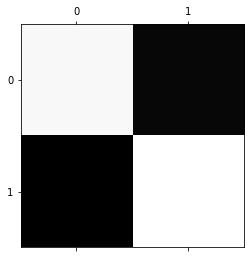

In [ ]:
cf= confusion_matrix(y_train, lr_train_predict)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()

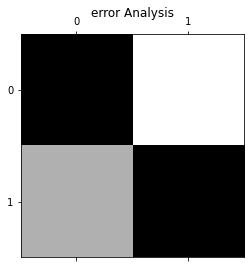

In [ ]:
# Analyzing the Errors
row_sums = cf.sum(axis=1 , keepdims = True)
normal_cf = cf/row_sums

np.fill_diagonal(normal_cf,0)
plt.matshow(normal_cf,cmap = plt.cm.gray)

plt.title("error Analysis")
plt.show()

In [ ]:
k = logistic_regression.score(X_train_pca, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 0.9330445544554455


In [ ]:
import sklearn.metrics as skm
print(skm.classification_report( y_train , lr_train_predict ))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4040
           1       0.92      0.95      0.93      4040

    accuracy                           0.93      8080
   macro avg       0.93      0.93      0.93      8080
weighted avg       0.93      0.93      0.93      8080



In [ ]:
# running model on the test set
predict = logistic_regression.predict(X_test_pca)
print(predict)

[0 0 0 ... 0 0 1]


## 3rd approach:

In [ ]:
sc = StandardScaler()
pca = PCA()
lr_model_p = LogisticRegression().fit(X_train, y_train)
yp_lr = lr_model_p.predict(X_test)

In [ ]:
pipe = Pipeline(steps=[('sc',sc),
                      ('pca',pca),
                      ('logistic', logistic)])

n_components = list(range(1,X.shape[1]+1,1))
param_grid = {
    'pca__n_components': n_components,
    'logistic__C': np.logspace(-4, 4, 4),
}


clf = GridSearchCV(pipe, param_grid)

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
           

In [ ]:
# Viewing The Best Parameters

#print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['logistic'])



Best max_depth: 0.046415888336127774
Best Number Of Components: 20

LogisticRegression(C=0.046415888336127774, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.1,
                   verbose=0, warm_start=False)


In [ ]:
clf_lr_1 = LogisticRegression(C=0.046415888336127774, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.1,
                   verbose=0, warm_start=False)
clf_lr_1.fit(X_train, y_train)
print(clf_lr_1.score(X_test, y_test))

0.903960396039604


In [ ]:
results = cross_val_score(clf_lr_1, X, y, cv=KFold_validation)
print (results)
print(np.mean(results))

[0.639 0.645 0.788 0.936 0.949 0.945 0.945 0.937 0.949 0.943]
0.8675271563429459


In [ ]:
print(confusion_matrix(y_test, yp_lr))
print(accuracy_score(y_test, yp_lr))
print(classification_report(y_test, yp_lr))

[[927  83]
 [ 60 950]]
0.9292079207920793
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1010
           1       0.92      0.94      0.93      1010

    accuracy                           0.93      2020
   macro avg       0.93      0.93      0.93      2020
weighted avg       0.93      0.93      0.93      2020



## 4. Decision Tree: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
sc = StandardScaler()
pca = PCA()
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
yp_DT = decisiontree.predict(X_test)

pipe = Pipeline(steps=[('sc',sc),
                      ('pca',pca),
                      ('decisiontree', decisiontree)])

n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]

parameters = dict(pca__n_components = n_components,
                 decisiontree__criterion = criterion,
                 decisiontree__max_depth = max_depth)

clf = GridSearchCV(pipe, parameters)
clf.fit(X_train,y_train)

# Viewing The Best Parameters

print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['decisiontree'])



Best Criterion: entropy
Best max_depth: 12
Best Number Of Components: 24

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# building the model with the best parameters
clf2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))

0.94009900990099


Model with the best parameters:

Model evaluation:

In [ ]:
results = cross_val_score(clf2, X, y, cv=KFold_validation)
print (results)
print(np.mean(results))

[0.777 0.795 0.863 0.932 0.943 0.933 0.926 0.919 0.942 0.922]
0.8952244035303245


In [ ]:
print(confusion_matrix(y_test, yp_DT))
print(accuracy_score(y_test, yp_DT))
print(classification_report(y_test, yp_DT))

[[949  61]
 [ 67 943]]
0.9366336633663367
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1010
           1       0.94      0.93      0.94      1010

    accuracy                           0.94      2020
   macro avg       0.94      0.94      0.94      2020
weighted avg       0.94      0.94      0.94      2020



## 5. Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
sc = StandardScaler()
pca = PCA()
GB_clf = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
yp_GB = GB_clf.predict(X_test)

In [ ]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', GradientBoostingClassifier())
])
score = {'f1': 'f1', 'accuracy': 'accuracy'}
N_FEATURES_OPTIONS = [2,4]
max_dep = [3,4,6]
n_est = [50]
min_samp = [4,5]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
 #      'classify__n_estimators': n_est,
        'classify__max_depth': max_dep,
 #       'classify__min_samples_split':min_samp
    }]
reducer_labels = ['PCA']

grid_adc = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid, scoring=score, refit='accuracy')

In [ ]:
grid_adc.fit(X_train, y_train)
grid_adc.best_params_

{'classify__max_depth': 6,
 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 'reduce_dim__n_components': 4}

In [ ]:

# Viewing The Best Parameters

#print('Best Criterion:', grid_adc.best_estimator_.get_params()['reduce_dim__n_components'])
print('Best max_depth:', grid_adc.best_estimator_.get_params()['classify__max_depth'])
print('Best Number Of Components:', grid_adc.best_estimator_.get_params()['reduce_dim__n_components'])
print(); print(grid_adc.best_estimator_.get_params()['classify'])



Best max_depth: 6
Best Number Of Components: 4

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# building the model with the best parameters
GB_clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GB_clf.fit(X_train, y_train)
print(GB_clf.score(X_test, y_test))

0.9569306930693069


### evaluation and comparison of models with selectKBest and PCA all together:

SelectKBest:

In [ ]:
print (f'Linear regression Classifier : { round (lr_grid_model.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, yp_lr_grid_model))
print(accuracy_score(y_test, yp_lr_grid_model))
print(classification_report(y_test, yp_lr_grid_model))
print ('--------------------------------------------------------------------------')
print (f'Desicion Tree Classifier : { round (rf_model_1.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, yp_rf_2))
print(accuracy_score(y_test, yp_rf_2))
print(classification_report(y_test, yp_rf_2))
print ('--------------------------------------------------------------------------')
print (f'Support Vector Machine Classifier : { round (Model_SVC_1.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, yp_SVC_1))
print(accuracy_score(y_test, yp_SVC_1))
print(classification_report(y_test, yp_SVC_1))
print ('--------------------------------------------------------------------------')
print (f'Gradient Boosting Classifier : { round (clf_GB_2.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, yp_GB_2))
print(accuracy_score(y_test, yp_GB_2))
print(classification_report(y_test, yp_GB_2))

Linear regression Classifier : 93.0%
[[930  80]
 [ 59 951]]
0.9311881188118812
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1010
           1       0.92      0.94      0.93      1010

    accuracy                           0.93      2020
   macro avg       0.93      0.93      0.93      2020
weighted avg       0.93      0.93      0.93      2020

--------------------------------------------------------------------------
Desicion Tree Classifier : 95.0%
[[955  55]
 [ 39 971]]
0.9534653465346534
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1010
           1       0.95      0.96      0.95      1010

    accuracy                           0.95      2020
   macro avg       0.95      0.95      0.95      2020
weighted avg       0.95      0.95      0.95      2020

--------------------------------------------------------------------------
Support Vector Machine Classifier : 94.0%


PCA:

In [ ]:
print (f'Gradient boosting Classifier : { round (GB_clf.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, yp_lr))
print(accuracy_score(y_test, yp_lr))
print(classification_report(y_test, yp_lr))
print ('--------------------------------------------------------------------------')
print (f'Decision tree  Classifier : { round (clf2.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, yp_DT))
print(accuracy_score(y_test, yp_DT))
print(classification_report(y_test, yp_DT))
print ('--------------------------------------------------------------------------')
print (f'Logistic regression Classifier : { round (clf_lr_1.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, yp_GB))
print(accuracy_score(y_test, yp_GB))
print(classification_report(y_test, yp_DT))
print ('--------------------------------------------------------------------------')
print (f'Support vector machine Classifier : { round (create_grid.score(X_test, y_test) *100,0)}%')
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gradient boosting Classifier : 96.0%
[[927  83]
 [ 60 950]]
0.9292079207920793
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1010
           1       0.92      0.94      0.93      1010

    accuracy                           0.93      2020
   macro avg       0.93      0.93      0.93      2020
weighted avg       0.93      0.93      0.93      2020

--------------------------------------------------------------------------
Decision tree  Classifier : 94.0%
[[949  61]
 [ 67 943]]
0.9366336633663367
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1010
           1       0.94      0.93      0.94      1010

    accuracy                           0.94      2020
   macro avg       0.94      0.94      0.94      2020
weighted avg       0.94      0.94      0.94      2020

--------------------------------------------------------------------------
Logistic regression Classifier : 90.0%
[[

### Analysis and Conclusion:
* Decsion Tree algorithm has the highest accuracy and f1 score and we get better True positive and negative than other algorithms after hyperparameter tuning by GridSearchCV when we use SelectKBest as a feature selector. and we almost get a equal score between our training set and testing set, which indicates that there is no overfitting when we use either SelectKBest or PCA. also when we use PCA, we get a more accurate result and better True positive and negative with Decision tree and lowest score with Support vector machine algorithm. 


Automatically created module for IPython interactive environment


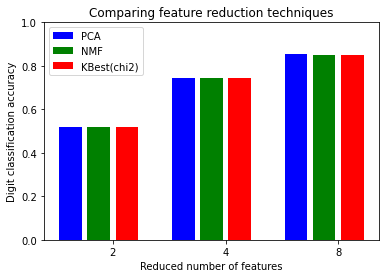

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF


print(__doc__)

pipe = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('reduce_dim', 'passthrough'),
    ('classify', LinearSVC(dual=False, max_iter=10000))
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
X, y = load_digits(return_X_y=True)
grid.fit(X, y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

plt.show()